In [123]:
%%capture
%pip install nfl_data_py --upgrade
# lets take a look at qb stats in the first 3 quarters of games of the regular season

In [124]:
import nfl_data_py as nfl
import numpy as np
import pandas as pd

In [125]:
pbp_df = nfl.import_pbp_data([2022])

2022 done.
Downcasting floats.


In [126]:
print(pbp_df.columns.tolist())

['play_id', 'game_id', 'old_game_id', 'home_team', 'away_team', 'season_type', 'week', 'posteam', 'posteam_type', 'defteam', 'side_of_field', 'yardline_100', 'game_date', 'quarter_seconds_remaining', 'half_seconds_remaining', 'game_seconds_remaining', 'game_half', 'quarter_end', 'drive', 'sp', 'qtr', 'down', 'goal_to_go', 'time', 'yrdln', 'ydstogo', 'ydsnet', 'desc', 'play_type', 'yards_gained', 'shotgun', 'no_huddle', 'qb_dropback', 'qb_kneel', 'qb_spike', 'qb_scramble', 'pass_length', 'pass_location', 'air_yards', 'yards_after_catch', 'run_location', 'run_gap', 'field_goal_result', 'kick_distance', 'extra_point_result', 'two_point_conv_result', 'home_timeouts_remaining', 'away_timeouts_remaining', 'timeout', 'timeout_team', 'td_team', 'td_player_name', 'td_player_id', 'posteam_timeouts_remaining', 'defteam_timeouts_remaining', 'total_home_score', 'total_away_score', 'posteam_score', 'defteam_score', 'score_differential', 'posteam_score_post', 'defteam_score_post', 'score_differential

In [127]:
pd.options.display.max_columns = None

cols = ['play_id',
 'qtr',
 'week',
 'play_type',
 'yards_gained',
 'qb_scramble',
 'incomplete_pass',
 'penalty',
 'rush_attempt',
 'pass_attempt',
 'sack',
 'touchdown',
 'pass_touchdown',
 'rush_touchdown',
 'two_point_attempt',
 'complete_pass',
 'passer_player_name',
 'passing_yards',
 'receiving_yards',
 'rusher_player_name',
 'rushing_yards',
 'result',
 'aborted_play',
 'success',
 'passer',
 'rusher',
 'pass',
 'rush',
 'fantasy_player_name',
 'fantasy_player_id']

pbp_df_filtered = pbp_df[cols]
pbp_df_filtered.loc[(pbp_df_filtered['two_point_attempt'] == 0.0) & (pbp_df_filtered['penalty'] == 0.0)]
#pbp_df_filtered_passing = pbp_df_filtered.loc[(pbp_df_filtered['play_type'] == 'pass') & (pbp_df_filtered['complete_pass'] == 1) & (pbp_df_filtered['week'] < 19) & (pbp_df_filtered['qtr'] < 3.9)]
pbp_df_filtered_passing = pbp_df_filtered.loc[(pbp_df_filtered['play_type'] == 'pass') & (pbp_df_filtered['complete_pass'] == 1) & (pbp_df_filtered['week'] < 19)]

weekly_df_yards_passing = pbp_df_filtered_passing.groupby(['passer_player_name', 'week'], as_index=False)['passer_player_name','yards_gained'].sum()


weekly_df_yards_passing['cumulative_passing_yards'] = weekly_df_yards_passing.groupby('passer_player_name')['yards_gained'].cumsum()

sorted_weekly_df_yards_passing = weekly_df_yards_passing.sort_values('cumulative_passing_yards', ascending=False)
sorted_weekly_df_yards_passing.head()


<ipython-input-127-a038a54efdd8>:39: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  weekly_df_yards_passing = pbp_df_filtered_passing.groupby(['passer_player_name', 'week'], as_index=False)['passer_player_name','yards_gained'].sum()
<ipython-input-127-a038a54efdd8>:39: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly_df_yards_passing = pbp_df_filtered_passing.groupby(['passer_player_name', 'week'], as_index=False)['passer_player_name','yards_gained'].sum()


,passer_player_name,week,yards_gained,cumulative_passing_yards
482,P.Mahomes,18,202.0,5250.0
481,P.Mahomes,17,328.0,5048.0
305,J.Herbert,18,273.0,4739.0
480,P.Mahomes,16,224.0,4720.0
554,T.Brady,18,84.0,4694.0


In [128]:
week_18_passing_cumulative_yards = sorted_weekly_df_yards_passing[sorted_weekly_df_yards_passing['week'] >= 10].groupby('passer_player_name')['cumulative_passing_yards'].max()

# Filter the players based on week 18 cumulative yards being greater than or equal to 3000
players_to_keep = week_18_passing_cumulative_yards[week_18_passing_cumulative_yards >= 3000].index

# Filter the DataFrame to keep only the players with week 18 cumulative yards >= 3000
filtered_passing_df = sorted_weekly_df_yards_passing[sorted_weekly_df_yards_passing['passer_player_name'].isin(players_to_keep)]
filtered_passing_df.head(20)

,passer_player_name,week,yards_gained,cumulative_passing_yards
482,P.Mahomes,18,202.0,5250.0
481,P.Mahomes,17,328.0,5048.0
305,J.Herbert,18,273.0,4739.0
480,P.Mahomes,16,224.0,4720.0
554,T.Brady,18,84.0,4694.0
553,T.Brady,17,432.0,4610.0
354,K.Cousins,18,225.0,4547.0
479,P.Mahomes,15,336.0,4496.0
231,J.Burrow,18,215.0,4475.0
304,J.Herbert,17,212.0,4466.0


In [129]:
players_to_keep

Index(['A.Rodgers', 'D.Carr', 'D.Jones', 'D.Mills', 'G.Smith', 'J.Allen',
       'J.Burrow', 'J.Goff', 'J.Herbert', 'J.Hurts', 'K.Cousins', 'M.Ryan',
       'P.Mahomes', 'R.Wilson', 'T.Brady', 'T.Lawrence', 'T.Tagovailoa'],
      dtype='object', name='passer_player_name')

In [130]:
#pbp_df_filtered_rushing = pbp_df_filtered.loc[pbp_df_filtered['play_type'].isin(['run', 'qb_kneel']) & (pbp_df_filtered['rusher_player_name'].isin(players_to_keep)) & (pbp_df_filtered['week'] < 19) & (pbp_df_filtered['qtr'] < 3.9)]
pbp_df_filtered_rushing = pbp_df_filtered.loc[pbp_df_filtered['play_type'].isin(['run', 'qb_kneel']) & (pbp_df_filtered['rusher_player_name'].isin(players_to_keep)) & (pbp_df_filtered['week'] < 19)]

weekly_df_yards_rushing = pbp_df_filtered_rushing.groupby(['rusher_player_name', 'week'], as_index=False)['rusher_player_name','yards_gained'].sum()


weekly_df_yards_rushing['cumulative_rushing_yards'] = weekly_df_yards_rushing.groupby('rusher_player_name')['yards_gained'].cumsum()

filtered_rushing_df = weekly_df_yards_rushing.sort_values('cumulative_rushing_yards', ascending=False)

filtered_rushing_df.head(20)

<ipython-input-130-9f1622a829e9>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  weekly_df_yards_rushing = pbp_df_filtered_rushing.groupby(['rusher_player_name', 'week'], as_index=False)['rusher_player_name','yards_gained'].sum()
<ipython-input-130-9f1622a829e9>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly_df_yards_rushing = pbp_df_filtered_rushing.groupby(['rusher_player_name', 'week'], as_index=False)['rusher_player_name','yards_gained'].sum()


,rusher_player_name,week,yards_gained,cumulative_rushing_yards
83,J.Allen,18,16.0,764.0
145,J.Hurts,18,13.0,764.0
144,J.Hurts,15,63.0,751.0
82,J.Allen,16,41.0,748.0
39,D.Jones,17,91.0,708.0
81,J.Allen,15,79.0,707.0
143,J.Hurts,14,77.0,688.0
80,J.Allen,14,47.0,628.0
38,D.Jones,16,34.0,617.0
142,J.Hurts,13,12.0,611.0


In [131]:
combined_df = filtered_passing_df.merge(filtered_rushing_df, left_on=['passer_player_name','week'], right_on = ['rusher_player_name','week'], how='left')
combined_df['cumulative_rushing_yards'] = combined_df['cumulative_rushing_yards'].fillna(0)
combined_df['total_yards'] = combined_df['cumulative_passing_yards'] + combined_df['cumulative_rushing_yards']

combined_df.head(30)

,passer_player_name,week,yards_gained_x,cumulative_passing_yards,rusher_player_name,yards_gained_y,cumulative_rushing_yards,total_yards
0,P.Mahomes,18,202.0,5250.0,P.Mahomes,29.0,360.0,5610.0
1,P.Mahomes,17,328.0,5048.0,P.Mahomes,8.0,331.0,5379.0
2,J.Herbert,18,273.0,4739.0,J.Herbert,-1.0,147.0,4886.0
3,P.Mahomes,16,224.0,4720.0,P.Mahomes,8.0,323.0,5043.0
4,T.Brady,18,84.0,4694.0,NaN,NaN,0.0,4694.0
5,T.Brady,17,432.0,4610.0,T.Brady,4.0,-1.0,4609.0
6,K.Cousins,18,225.0,4547.0,NaN,NaN,0.0,4547.0
7,P.Mahomes,15,336.0,4496.0,P.Mahomes,33.0,315.0,4811.0
8,J.Burrow,18,215.0,4475.0,J.Burrow,10.0,257.0,4732.0
9,J.Herbert,17,212.0,4466.0,J.Herbert,2.0,148.0,4614.0


<ipython-input-132-6e13fadb3c49>:13: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for player, group in grouped:


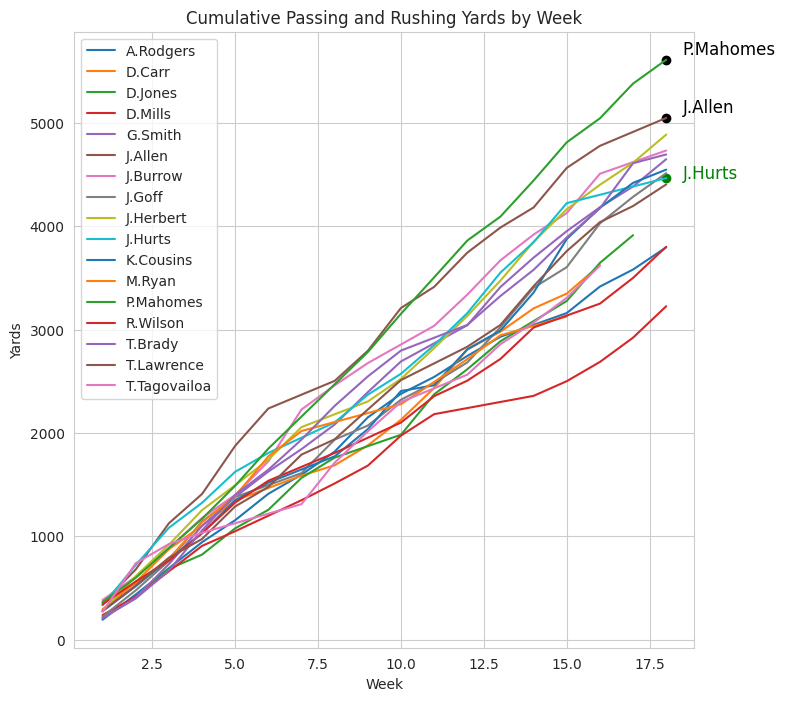

In [132]:
import seaborn as sns;
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')


grouped = combined_df.groupby(['passer_player_name'], as_index=False)

# Initialize the figure and axis
fig, ax = plt.subplots(figsize=(8,8))

for player, group in grouped:
    plt.plot(group['week'], group['total_yards'], label=player)
    #plt.plot(group['week'], group['cumulative_rushing_yards'], label=player)



notable_players = [
    'J.Hurts'
]

for player_name in notable_players:
  player = combined_df.loc[(combined_df['passer_player_name'] == player_name) & (combined_df['week'] == 18)]
  if not player.empty:
    yards = player['total_yards']
    ax.annotate(player_name, xy=[18+.5,yards], color='green', fontsize='12')
    ax.scatter(18, yards, color='green')

notable_players2 = [
    'J.Allen', 'P.Mahomes'
]
for player_name in notable_players2:
  player = combined_df.loc[(combined_df['passer_player_name'] == player_name) & (combined_df['week'] == 18)]
  if not player.empty:
    yards = player['total_yards']
    ax.annotate(player_name, xy=[18+.5,yards+50], color='black', fontsize='12')
    ax.scatter(18, yards, color='black')


# Set labels and title
ax.set_xlabel('Week')
ax.set_ylabel('Yards')
plt.legend()
ax.set_title('Cumulative Passing and Rushing Yards by Week')

# Show the plot
plt.show()
